In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from config import data_path

In [ ]:
data = pd.read_parquet(os.path.join(data_path,'SPY_new.parquet'))

,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,...,sic,index_flag,exchange_d,class,issue_type,industry_group,issuer,div_convention,exercise_style,am_set_flag
0,109820,2005-01-10,SFB.AA,0,2005-01-22,None,C,131000,0.0,0.05,...,NaN,0,1,NaN,%,NaN,SSGA ACTIVE TRUST,NaN,A,NaN
1,109820,2005-01-10,SFB.AB,0,2005-01-22,None,C,132000,0.0,0.05,...,NaN,0,1,NaN,%,NaN,SSGA ACTIVE TRUST,NaN,A,NaN
2,109820,2005-01-10,SFB.AC,0,2005-01-22,None,C,133000,0.0,0.05,...,NaN,0,1,NaN,%,NaN,SSGA ACTIVE TRUST,NaN,A,NaN
3,109820,2005-01-10,SFB.AD,0,2005-01-22,None,C,134000,0.0,0.05,...,NaN,0,1,NaN,%,NaN,SSGA ACTIVE TRUST,NaN,A,NaN
4,109820,2005-01-10,SFB.AE,0,2005-01-22,None,C,135000,0.0,0.05,...,NaN,0,1,NaN,%,NaN,SSGA ACTIVE TRUST,NaN,A,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,109820,2005-01-11,SFB.FO,0,2005-06-18,None,C,145000,0.0,0.05,...,NaN,0,1,NaN,%,NaN,SSGA ACTIVE TRUST,NaN,A,NaN
996,109820,2005-01-11,SFB.FP,0,2005-06-18,None,C,146000,0.0,0.05,...,NaN,0,1,NaN,%,NaN,SSGA ACTIVE TRUST,NaN,A,NaN
997,109820,2005-01-11,SFB.FQ,0,2005-06-18,None,C,147000,0.0,0.05,...,NaN,0,1,NaN,%,NaN,SSGA ACTIVE TRUST,NaN,A,NaN
998,109820,2005-01-11,SFB.FR,0,2005-06-18,None,C,148000,0.0,0.05,...,NaN,0,1,NaN,%,NaN,SSGA ACTIVE TRUST,NaN,A,NaN


In [3]:
df_option = data[data['exdate'] != '2015-12-19']
df_option = df_option[df_option['exdate'] != '2018-12-23']

df_option = df_option[
    (df_option['open_interest'] > 0) &
    #(df_option['gamma'].notnull()) &  # 防止 NaN
    (df_option['best_bid'] > 0) &
    (df_option['best_offer'] > 0) &
    df_option['cp_flag'].isin(['C', 'P'])
]

df_option ['mid_price'] = (df_option ['best_bid'] + df_option ['best_offer']) / 2   

df_option.head()

,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,...,index_flag,exchange_d,class,issue_type,industry_group,issuer,div_convention,exercise_style,am_set_flag,mid_price
985,109820,2005-01-11,SFB.FE,0,2005-06-18,2005-01-10,C,135000,0.10,0.20,...,0,1,NaN,%,NaN,SSGA ACTIVE TRUST,NaN,A,NaN,0.150
999,109820,2005-01-11,SFB.FZ,0,2005-06-18,2005-01-10,C,130000,0.50,0.55,...,0,1,NaN,%,NaN,SSGA ACTIVE TRUST,NaN,A,NaN,0.525
1009,109820,2005-01-11,SFB.IJ,0,2005-09-17,2005-01-10,C,140000,0.15,0.25,...,0,1,NaN,%,NaN,SSGA ACTIVE TRUST,NaN,A,NaN,0.200
1018,109820,2005-01-11,SFB.IZ,0,2005-09-17,2005-01-11,C,130000,1.25,1.30,...,0,1,NaN,%,NaN,SSGA ACTIVE TRUST,NaN,A,NaN,1.275
1028,109820,2005-01-11,SFB.LJ,0,2005-12-17,2005-01-10,C,140000,0.45,0.55,...,0,1,NaN,%,NaN,SSGA ACTIVE TRUST,NaN,A,NaN,0.500


In [4]:
df_option['date'] = pd.to_datetime(df_option['date'])
df_option = df_option[df_option['date']>='2016-01-01']

In [5]:
stock_price = pd.read_csv(os.path.join(data_path, 'SPY_10Y_latest.csv'))
stock_price['date'] = pd.to_datetime(stock_price['date'])

In [6]:
df_merged = pd.merge(df_option,stock_price,on='date')
df_merged = df_merged[['date', 'exdate', 'cp_flag', 'strike_price', 'best_bid', 'best_offer', 'mid_price', 'close_price',
                       'volume', 'open_interest', 'impl_volatility', 'delta', 'gamma', 'vega', 'theta',
                       'contract_size']]
df_merged.head()

,date,exdate,cp_flag,strike_price,best_bid,best_offer,mid_price,close_price,volume,open_interest,impl_volatility,delta,gamma,vega,theta,contract_size
0,2016-01-04,2016-01-08,C,150000,50.53,50.90,50.715,201.0192,3,1,NaN,NaN,NaN,NaN,NaN,100
1,2016-01-04,2016-01-08,C,160000,40.53,40.89,40.710,201.0192,0,2,NaN,NaN,NaN,NaN,NaN,100
2,2016-01-04,2016-01-08,C,170000,30.54,30.91,30.725,201.0192,0,4,NaN,NaN,NaN,NaN,NaN,100
3,2016-01-04,2016-01-08,C,180000,20.56,20.92,20.740,201.0192,40,152,NaN,NaN,NaN,NaN,NaN,100
4,2016-01-04,2016-01-08,C,185000,15.57,15.93,15.750,201.0192,1,15,NaN,NaN,NaN,NaN,NaN,100


In [45]:
df_merged['gamma_exposure'] = df_merged['gamma'] *  100 * df_merged['open_interest'] * df_merged['close_price']**2 * 0.01

In [46]:
call_gamma = df_merged[df_merged['cp_flag'] == 'C'].groupby('date')['gamma_exposure'].sum()
put_gamma = df_merged[df_merged['cp_flag'] == 'P'].groupby('date')['gamma_exposure'].sum()

gamma_exposure = pd.DataFrame({'GEX': call_gamma - put_gamma,'GEX_Skew': (call_gamma - put_gamma)/(call_gamma + put_gamma)}).reset_index()
gamma_exposure.head()

,date,GEX,GEX_Skew
0,2016-01-04,-3.811780e+09,-0.326780
1,2016-01-05,-3.581006e+09,-0.266577
2,2016-01-06,-4.930171e+09,-0.382733
3,2016-01-07,-5.145095e+09,-0.500564
4,2016-01-08,-4.645421e+09,-0.511684


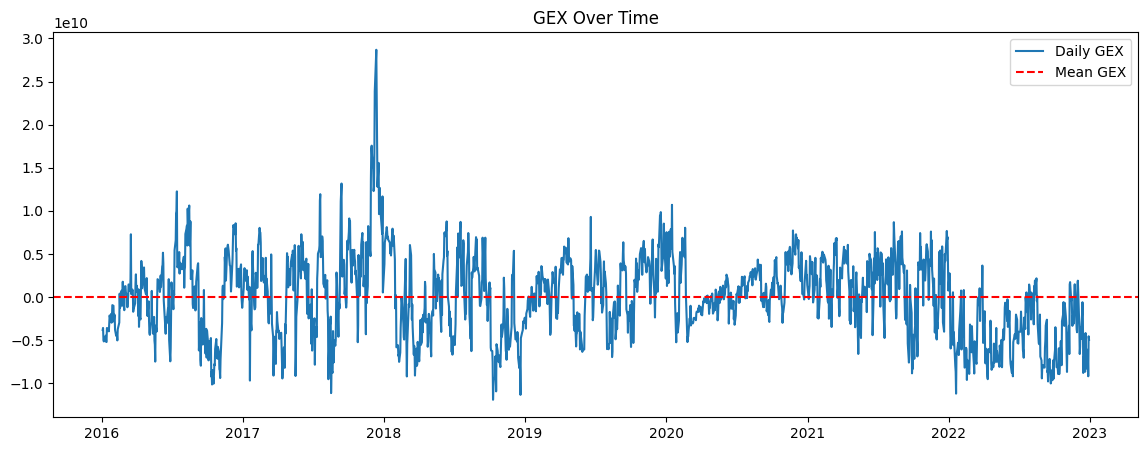

In [47]:
gex_df = gamma_exposure.sort_values('date')
gex_df.set_index('date', inplace=True)
plt.figure(figsize=(14, 5))
plt.plot(gex_df['GEX'], label='Daily GEX')
plt.axhline(gex_df['GEX'].mean(), color='red', linestyle='--', label='Mean GEX')
plt.title('GEX Over Time')
plt.legend()
plt.show()

In [34]:
stock_price[stock_price['date']=='2022-12-30']

,date,close_price
1950,2022-12-30,382.43


In [59]:
import yfinance as yf

# Try again with adjusted parameters
df_aapl = yf.download("AAPL", start="2010-01-01")


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')


In [48]:
df_sq = pd.read_csv(os.path.join(data_path, 'sqzme.csv'))
df_sq['date'] = pd.to_datetime(df_sq['date'])
gex_sq = df_sq.rename(columns={'gex':'gex_sq'})
gex_sq = gex_sq[['date','gex_sq']]

year
2016    0.732941
2017    0.739735
2018    0.895163
2019    0.882194
2020    0.689766
2021    0.602299
2022    0.807299
dtype: float64
rolling 30-day correlation


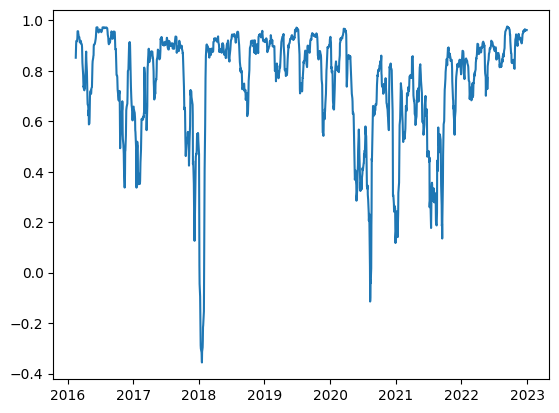

In [68]:
compare_gex = pd.merge(gamma_exposure, gex_sq, on='date')
compare_gex['year'] = compare_gex['date'].dt.year

compare_gex = compare_gex[(compare_gex['year'] >= 2016) & (compare_gex['year'] <= 2022)]

compare_gex = compare_gex.dropna(subset=['GEX', 'gex_sq'])

yearly_corr = compare_gex.groupby('year').apply(lambda x: x['GEX'].corr(x['gex_sq']))

print(yearly_corr)

print('rolling 30-day correlation')
plt.plot(compare_gex['date'],compare_gex['gex_sq'].rolling(window=30).corr(compare_gex['GEX']))